# Data Augmentation
Let's take an in-depth look at the training data.

In [37]:
%matplotlib inline
from random import randint
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd

## Read CSVs

In [3]:
# Read CSVs using pandas.
ferplus = pd.read_csv('../data/ferplus.csv')
ckplus = pd.read_csv('../data/ckplus.csv')
# Extract and cast pixel intensities.
ferplus.pixels = ferplus.pixels.str.split()
ferplus.pixels = ferplus.pixels.map(lambda p: pd.to_numeric(p, downcast='float'))
ckplus.pixels = ckplus.pixels.str.split()
ckplus.pixels = ckplus.pixels.map(lambda p: pd.to_numeric(p, downcast='float'))

In [4]:
# Class labels in the usual order.
classes = ['anger', 'disgust', 'fear', 'happiness', 'sadness', 'surprise', 'neutral']

## Class Distributions

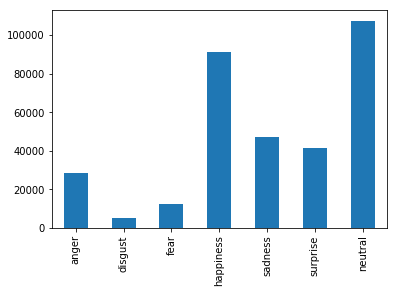

In [8]:
ferplus.sum(axis=0)[classes].plot.bar()

The class distributions is imbalanced.

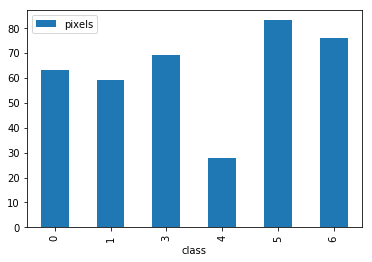

In [33]:
ckplus.groupby('class').agg('count').plot.bar()

## Examples from the Datasets
Let's look at some random examples from the datasets. Here's a helper function for plotting the images:

In [1]:
def plot_images(images, cls_true, cls_pred=None, shape=(48, 48)):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(shape), cmap='gray')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        # Show the classes as the label on the x-axis.
        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
    
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

In [2]:
i = randint(0, len(ckplus) - 9)
ckplus_samples = ckplus[i:i+9]['pixels']
ckplus_classes = ckplus[i:i+9]['class']

plot_images(images=ckplus_samples.values, cls_true=ckplus_classes.values, shape=(128,128))

NameError: name 'randint' is not defined